In [2]:
import json
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk, ellipj
from pathlib import Path
from scipy.signal import find_peaks

In [ ]:
config = {
    "dt": 0.001,
    "x0": np.radians(120),
    "v0": 0.0,
    "w": 5.0,
    "steps": 100000/2,
    "output_path": "output.txt"
}

current_dir = Path.cwd()
exe_path = current_dir / "simulator"
config_path = current_dir / "config.json"

print("exe_path:", exe_path)
print("config_path:", config_path)
with open(config_path, "w") as f:
    json.dump(config, f, indent=4)

subprocess.run([str(exe_path), str(config_path)], check=True)

exe_path: /workspaces/Physics-processes-modeling-3-sem/6w/simulator
config_path: /workspaces/Physics-processes-modeling-3-sem/6w/config.json


CompletedProcess(args=['/workspaces/Physics-processes-modeling-3-sem/6w/simulator', '/workspaces/Physics-processes-modeling-3-sem/6w/config.json'], returncode=0)

In [12]:
def analytical_pendulum_solution(t, theta0_rad, omega0):
    k = np.sin(theta0_rad / 2.0)
    K = ellipk(k**2)

    theta_analytical = np.zeros_like(t)
    for i, time in enumerate(t):
        u = omega0 * time + K
        sn, cn, dn, ph = ellipj(u, k**2)
        theta_analytical[i] = 2.0 * np.arcsin(k * sn)

    return theta_analytical

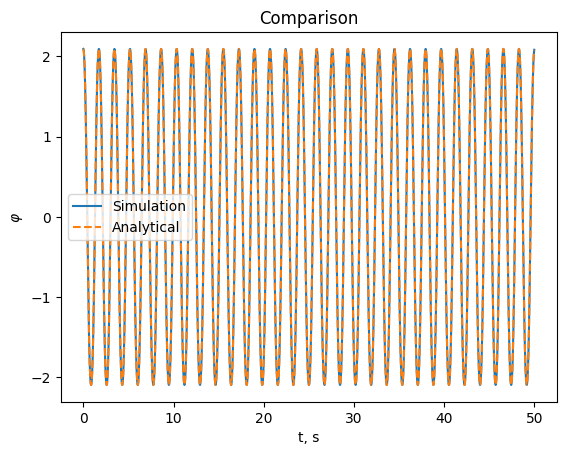

In [17]:
data = np.loadtxt(config["output_path"])
t, x, v = data[:, 0], data[:, 1], data[:, 2]
w=config["w"]
dt=config["dt"]
x_analyt = analytical_pendulum_solution(t,x[0],w)
plt.plot(t, x, label="Simulation")
plt.plot(t,x_analyt, label="Analytical", ls="--")
plt.xlabel("t, s")
plt.ylabel(r"$\varphi$")
plt.legend()
plt.title("Comparison")
plt.show()

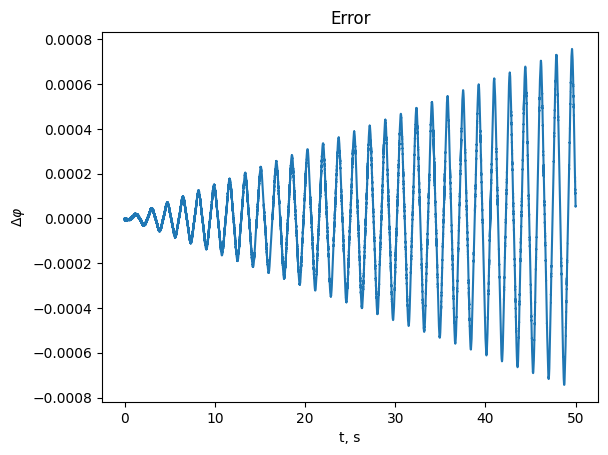

In [18]:
plt.plot(t,x-x_analyt, label="Error")
plt.xlabel("t, s")
plt.ylabel(r"$\Delta\varphi$")
plt.title("Error")
plt.show()

Text(0.5, 1.0, 'Energy')

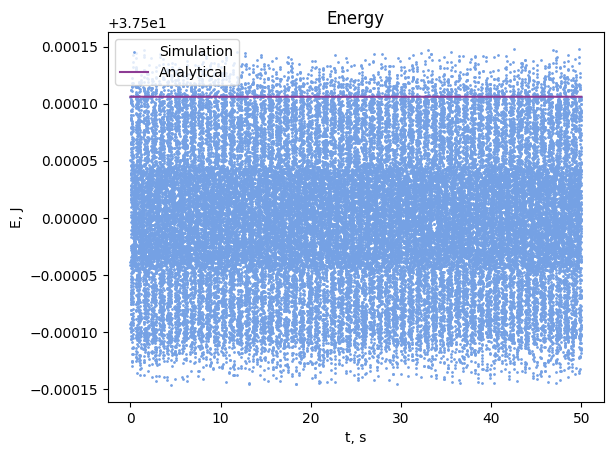

In [19]:
E=0.5 * v**2 + w**2 * (1 - np.cos(x))
plt.scatter(t, E, s=1, label="Simulation",color="#75a1e4")
E0 = 0.5 * v[0]**2 + w**2 * (1 - np.cos(x[0]))
plt.plot(t, [E0]*len(t), label="Analytical",color="#8d3b94")
plt.xlabel("t, s")
plt.ylabel("E, J")
plt.legend()
plt.title("Energy")

Text(0.5, 1.0, 'Fase diagram')

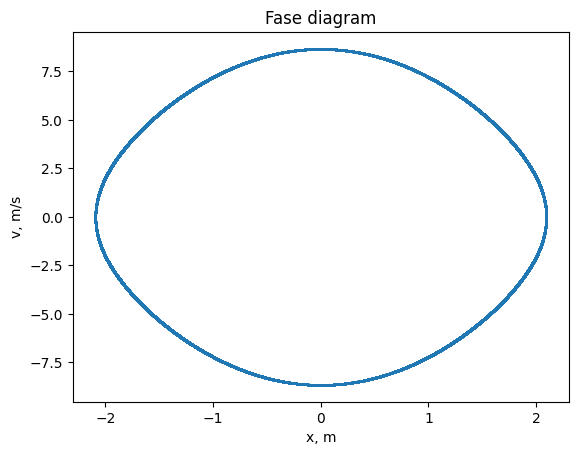

In [20]:
plt.scatter(x,v,s=1)
plt.xlabel("x, m")
plt.ylabel("v, m/s")
plt.title("Fase diagram")


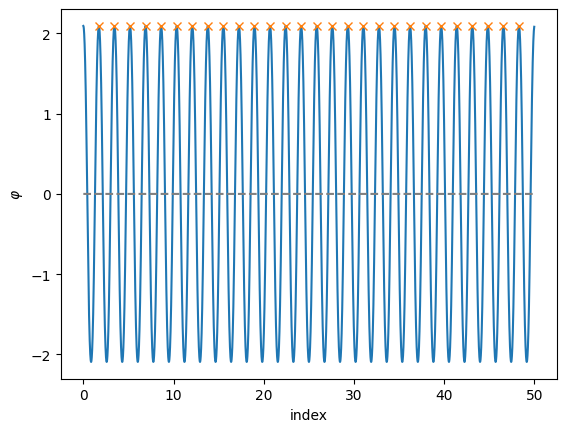

Text(0, 0.5, '$\\Delta t=t_{n+1}-t_n$')

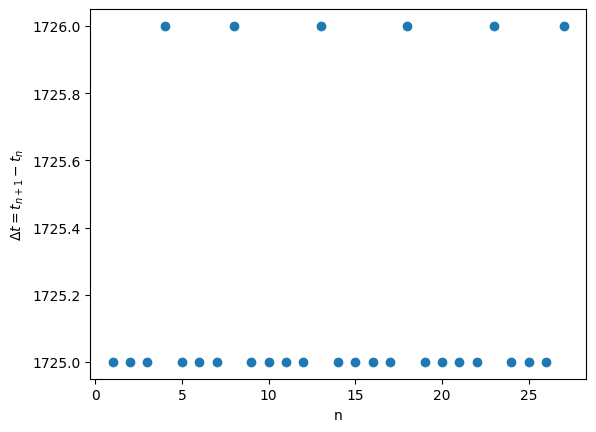

In [21]:
peaks, _ = find_peaks(x)
plt.plot(t,x)
plt.plot(peaks*dt, x[peaks], "x")
plt.plot(t,np.zeros_like(t), "--", color="gray")
plt.xlabel("index")
plt.ylabel(r"$\varphi$")
plt.show()
Ts=[]
n=[]
for i in range(1,len(peaks)):
    Ts.append(peaks[i]-peaks[i-1])
    n.append(i)
Ts=np.array(Ts)
plt.scatter(n,Ts)
plt.xlabel("n")
plt.ylabel(r"$\Delta t=t_{n+1}-t_n$")